        Data Science: A Programming Approach
        Manasa Gonuguntla
        University of Texas Arlington
        11/1/2022

<h1 align='center' style="color: purple;">Individual Project - Fashion DataSet</h1>

Working on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces.Aftering loading the data, i saved that to two csv files to use the concept chunk.Reading and diving the data into 10 chunks.First I have appield the models on the entire data without doing any dimentional reduction. Applied PCA for dimention reduction from 784 to 144. Apply the models after diemnsion reduction. Printed all the confusion matrixes for each model. Out of all the models Random forest classifier is doing better.    

Load the dataset

In [1]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train,y_train,X_test, y_test whether there are any missing values. 

In [2]:
import pandas as pd
import numpy as np
print(X_train.shape)
x_train_n= X_train.reshape((60000,784))
X_train_DF= pd.DataFrame(x_train_n)
X_train_DF.isnull().any()

(60000, 28, 28)


0      False
1      False
2      False
3      False
4      False
       ...  
779    False
780    False
781    False
782    False
783    False
Length: 784, dtype: bool

In [3]:
print(y_train.shape)
y_train_DF= pd.DataFrame(y_train)
y_train_DF.isnull().any()

(60000,)


0    False
dtype: bool

In [4]:
print(X_test.shape)
x_test_n= X_train.reshape((60000,784))
X_test_DF= pd.DataFrame(x_test_n)
X_test_DF.isnull().any()

(10000, 28, 28)


0      False
1      False
2      False
3      False
4      False
       ...  
779    False
780    False
781    False
782    False
783    False
Length: 784, dtype: bool

In [5]:
print(y_test.shape)
y_test_DF= pd.DataFrame(y_test)
y_test_DF.isnull().any()

(10000,)


0    False
dtype: bool

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

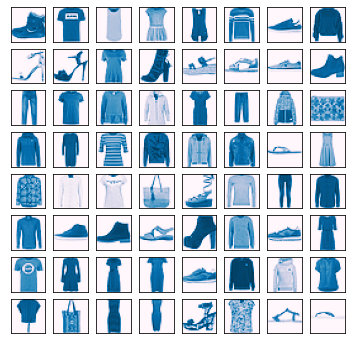

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(8, 8, figsize=(6, 6)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i], cmap='PuBu')
    axi.set(xticks=[], yticks=[])

(10000, 28, 28)


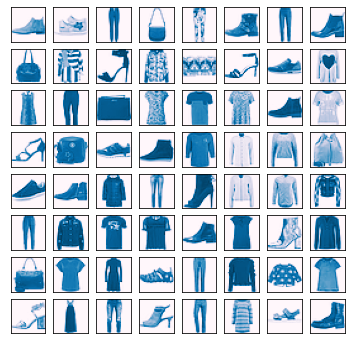

In [7]:
print(X_test.shape)
fig, ax = plt.subplots(8, 8, figsize=(6, 6)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[-i], cmap='PuBu')
    axi.set(xticks=[], yticks=[])

Tried to visualize what happenes if I convert this gray scale image to RGB to check whether the images will appear in color or not?

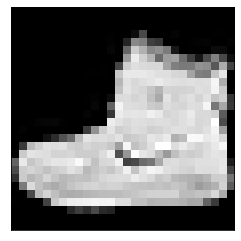

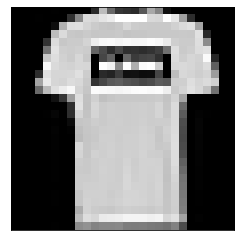

In [8]:
import numpy as np
from PIL import Image
for i in range(2):
    a_sample_digit_image= np.array(Image.fromarray(X_train[i]).convert('RGB'))
    #print(X_train[i])
    New_sample_digit_image = a_sample_digit_image.reshape(28,28,3)
    fig,ax=plt.subplots(figsize=(4,8))
    ax.imshow(New_sample_digit_image)
    ax.set(xticks=[],yticks=[])
    plt.show()

As the original image's three channels value is averaged we can't know the exact value for each channel.

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [9]:
y_train[10]

0

In [10]:
y_train.shape

(60000,)

Enter the number to visulaize in training data(<60000):5000
4


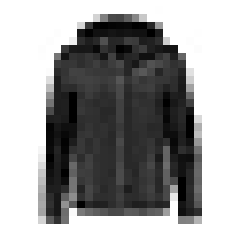

In [11]:
Num = int(input("Enter the number to visulaize in training data(<60000):"))
print(y_train[Num])
sample_image = X_train[Num]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The above code shows that the image belongs to category 6. To get the associated label with each category, you can use the following code:

In [12]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[Num]])

Coat


Now, applying basic naive bayes algorithm on the given dataset to set the as benchmark for evaluting other algorithms.

In [13]:
import pickle
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test = Fashion_test['label']
X_test = Fashion_test.drop(['label'],axis=1)
Naive_M= GaussianNB()
training_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    training_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time Naive_M.fit(X_train, Y_train)
pickle.dump(Naive_M, open('Naive_M.pkl', 'wb'))
pickled_model = pickle.load(open('Naive_M.pkl', 'rb'))

(10000, 785)
Wall time: 319 ms
(10000, 785)
Wall time: 377 ms
(10000, 785)
Wall time: 387 ms
(10000, 785)
Wall time: 402 ms
(10000, 785)
Wall time: 328 ms
(10000, 785)
Wall time: 350 ms


INSAMPLE RESULTS:



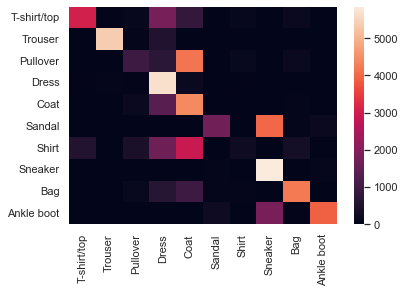

In [14]:
print("INSAMPLE RESULTS:")
print()
Y_train = training_data['label']
X_train = training_data.drop(['label'],axis=1)
y_train_hat_N = pickled_model.predict(X_train)
CF_matrix= confusion_matrix(Y_train,y_train_hat_N)
import seaborn as sns; sns.set() 
cm_df = pd.DataFrame(CF_matrix,
                     index = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], 
                     columns = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
sns.heatmap(cm_df, annot=False)
plt.show()

OUTSAMPLE RESULTS:



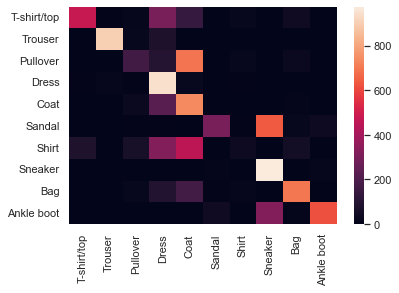

In [15]:
print("OUTSAMPLE RESULTS:")
print()
y_test_hat_N = pickled_model.predict(X_test)
cf_matrix=confusion_matrix(Y_test,y_test_hat_N)
import seaborn as sns; sns.set() 
cm_df = pd.DataFrame(cf_matrix,
                     index = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], 
                     columns = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
sns.heatmap(cm_df, annot=False)
plt.show()

In [16]:
out_of_sample_acc = accuracy_score(Y_test,y_test_hat_N, normalize = True) * 100
print("Out-of-sample Accuracy: ", out_of_sample_acc)

Out-of-sample Accuracy:  58.660000000000004


In [17]:
# crosschecking with out chunks
Fashion_t = pd.read_csv('fashion-mnist_train.csv') 
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
print(y_train.shape)
model = GaussianNB()
y_train= Fashion_t['label']
x_tarin=Fashion_t.drop(['label'],axis=1)
Y_t= Fashion_test['label']
x_t=Fashion_test.drop(['label'],axis=1)
model= model.fit(x_tarin, y_train)
ytest_hat = model.predict(x_t)
print(confusion_matrix(Y_t,ytest_hat))
print(classification_report(Y_t,ytest_hat))

(60000,)
[[594  42  25 196  87   0  16   0  40   0]
 [  0 940  16  33   2   1   8   0   0   0]
 [  4   7 324  68 553   0  21   0  23   0]
 [  6 311   6 644  25   0   5   0   3   0]
 [  0  33  37 155 765   0   1   0   9   0]
 [  1   1   1   2   0 289   6 648  14  38]
 [113  32 103 236 432   0  38   0  46   0]
 [  0   0   0   0   0   3   0 978   0  19]
 [  1   2  17  79 161   3  22   3 711   1]
 [  0   0   0   1   0  27   2 328  11 631]]
              precision    recall  f1-score   support

           0       0.83      0.59      0.69      1000
           1       0.69      0.94      0.79      1000
           2       0.61      0.32      0.42      1000
           3       0.46      0.64      0.53      1000
           4       0.38      0.77      0.51      1000
           5       0.89      0.29      0.44      1000
           6       0.32      0.04      0.07      1000
           7       0.50      0.98      0.66      1000
           8       0.83      0.71      0.77      1000
           9       

Logisctic regression without any PCA :

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
#from sklearn.metrics import metrics
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
Logistic_Model = LogisticRegression()
#Logistic_Model = LogisticRegression()
#param_grid = [    
#    {'penalty' : ['l2'],
#    'solver' : ['liblinear','sag'],
#    'max_iter' : [2000]
#    }
#]
#grid = GridSearchCV(Logistic_Model, param_grid, cv =2, scoring='accuracy')
#Logistic_Model2 = LogisticRegression(penalty='l2',solver='saga')
training_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    training_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    
    %time Logistic_Model = Logistic_Model.fit(X_train,Y_train)
  #  %time Logistic_Model2= grid.fit(X_train,Y_train)
pickle.dump(Logistic_Model, open('Logistic_withoutPCA.pkl', 'wb'))
pickled_model = pickle.load(open('Logistic_WithoutPCA.pkl', 'rb'))


(10000, 785)
Wall time: 2.35 s
(10000, 785)
Wall time: 2.37 s
(10000, 785)
Wall time: 2.36 s
(10000, 785)
Wall time: 2.36 s
(10000, 785)
Wall time: 2.34 s
(10000, 785)
Wall time: 2.42 s


In [19]:
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test = Fashion_test['label']
X_test = Fashion_test.drop(['label'],axis=1)
Y_test_hat_LM1 = pickled_model.predict(X_test)
print("OUTSAMPLE RESULTS:")
print()
print(confusion_matrix(Y_test,Y_test_hat_LM1))
print(classification_report(Y_test,Y_test_hat_LM1))

OUTSAMPLE RESULTS:

[[792  10  18  48   7   0 103   0  21   1]
 [  1 973   2  16   1   2   5   0   0   0]
 [ 25   5 735  13 129   0  84   0   9   0]
 [ 43  22  18 842  43   0  22   0   9   1]
 [  5   2 112  27 768   1  82   0   3   0]
 [  2   1   1   1   0 867   1  67   9  51]
 [155   5 111  36 118   0 552   0  23   0]
 [  0   0   0   0   0  36   0 909   0  55]
 [  7   2  14   5   6   8  18   5 934   1]
 [  0   0   0   0   0  15   0  35   2 948]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.95      0.97      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.85      0.84      0.85      1000
           4       0.72      0.77      0.74      1000
           5       0.93      0.87      0.90      1000
           6       0.64      0.55      0.59      1000
           7       0.89      0.91      0.90      1000
           8       0.92      0.93      0.93      1000
        

In [20]:
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train = Fashion_Train['label']
X_Train = Fashion_Train.drop(['label'],axis=1)
Y_Train_hat = pickled_model.predict(X_Train)
print("INSAMPLE RESULTS:")
print()
print(confusion_matrix(Y_Train,Y_Train_hat))
print(classification_report(Y_Train,Y_Train_hat))

print()
in_sample_acc = accuracy_score(Y_Train,Y_Train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test,Y_test_hat_LM1, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

INSAMPLE RESULTS:

[[4862   33  121  276   40    2  569    3   93    1]
 [  27 5780   27  108   35    0   18    2    2    1]
 [ 118   21 4474   64  772    2  500    0   48    1]
 [ 245  106   70 5078  288    0  181    1   30    1]
 [  21   14  649  169 4559    1  559    0   28    0]
 [   3    6    4    3    2 5358    7  305   60  252]
 [ 859   23  683  185  671    0 3443    2  133    1]
 [   0    0    0    0    1  212    2 5496   13  276]
 [  29   12   49   45   35   41   87   24 5670    8]
 [   0    0    0    0    0  120    0  202   11 5667]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6000
           1       0.96      0.96      0.96      6000
           2       0.74      0.75      0.74      6000
           3       0.86      0.85      0.85      6000
           4       0.71      0.76      0.74      6000
           5       0.93      0.89      0.91      6000
           6       0.64      0.57      0.61      6000
           7     

In [21]:
total_dataset = pd.concat([training_data,Fashion_test],axis =0, ignore_index=True)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# InitializeDimension Reduction model
pca = PCA(svd_solver='randomized', n_components=144, 
          whiten=True, random_state=0)
X = total_dataset.drop(['label'],axis=1)
y = total_dataset['label']    
%time PCA_full_Data= pca.fit_transform(X)

PCA_full_Data.shape  

Wall time: 10 s


(70000, 144)

In [22]:
X_PCA = PCA_full_Data.reshape((70000,12,12))
X_PCA.shape

(70000, 12, 12)

Enter the number to visulaize in training data(<60000):5000
0


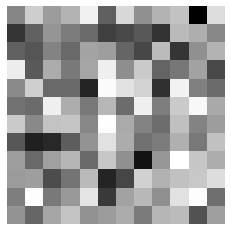

In [23]:
Num_1 = int(input("Enter the number to visulaize in training data(<60000):"))
print(y_train[Num_1])
sample_image = X_PCA[Num_1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

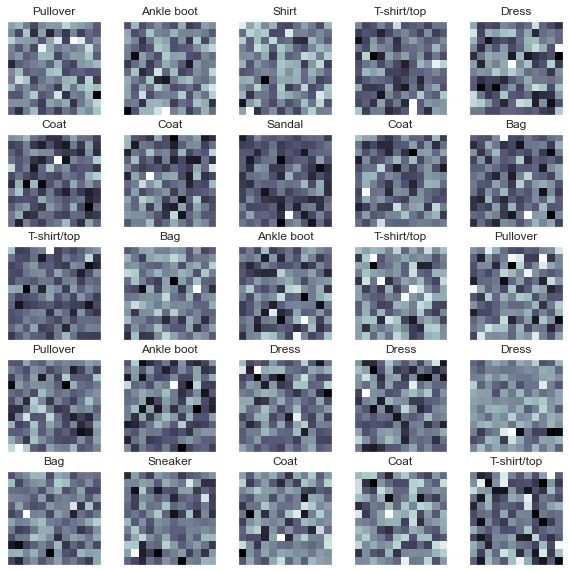

In [24]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_PCA[i], cmap='bone')
    axi.set_title(class_names[y[i]])
    axi.set(xticks=[], yticks=[])

In [28]:
PCA_full_Data.shape

(70000, 144)

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
Logistic_Model = LogisticRegression()
param_grid = [    
    {'penalty' : ['l2'],
    'solver' : ['liblinear','sag'],
    'max_iter' : [200,50]
    }
]
Xtrain, X_t, ytrain, y_t = train_test_split(PCA_full_Data, y, test_size=0.15, random_state=0)
grid = GridSearchCV(Logistic_Model, param_grid, cv =10, scoring='accuracy',n_jobs=-1)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
bestModel_LM = grid.best_estimator_
pickle.dump(bestModel_LM, open('Logistic_PCA_1.pkl', 'wb'))
pickled_model_LP = pickle.load(open('Logistic_PCA_1.pkl', 'rb'))


In [30]:
print("RESULTS:")
Y_t_hat_LP = pickled_model_LP.predict(X_t)
Y_train_hat_LP = pickled_model_LP.predict(Xtrain)
in_sample_acc = accuracy_score(ytrain,Y_train_hat_LP, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_t,Y_t_hat_LP, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
print("Out Sample results:")
print(confusion_matrix(y_t,Y_t_hat_LP))
print(classification_report(y_t,Y_t_hat_LP))
print("In Sample results:")
print(confusion_matrix(ytrain,Y_train_hat_LP))
print(classification_report(ytrain,Y_train_hat_LP))

RESULTS:
In-sample Accuracy:  86.07226890756301
Out-of-sample Accuracy:  85.48571428571428
Out Sample results:
[[ 846    5   16   39    2    1   87    0   15    2]
 [   3 1049    6   20    2    0    4    0    0    0]
 [  11    4  798    9  114    1   96    0   13    0]
 [  32   15   18  890   21    1   31    0    1    0]
 [   1    2  103   43  847    0  100    0    5    0]
 [   1    2    0    0    0  983    0   48    9   14]
 [ 162    1  120   31  100    1  582    0   23    0]
 [   0    0    0    0    0   31    0  975    2   36]
 [   5    1    3    9   10    9   16    7 1024    1]
 [   0    1    0    0    0   18    0   40    0  982]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1013
           1       0.97      0.97      0.97      1084
           2       0.75      0.76      0.76      1046
           3       0.85      0.88      0.87      1009
           4       0.77      0.77      0.77      1101
           5       0.94      0.93

SVM for given dataset

In [ ]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
#from sklearn.metrics import metrics
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
SVC_Model = SVC(class_weight='balanced',verbose=True)
SVM_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    SVM_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time SVM_Model = SVC_Model.fit(X_train,Y_train)
pickle.dump(SVM_Model, open('SVM_Model.pkl', 'wb'))

In [31]:
pickled_model_SVM = pickle.load(open('SVM_Model.pkl', 'rb'))

In [32]:
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train_SVM = Fashion_Train['label']
X_Train_SVM = Fashion_Train.drop(['label'],axis=1)
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test_SVM = Fashion_test['label']
X_test_SVM = Fashion_test.drop(['label'],axis=1)
print("RESULTS:")
Y_t_hat_SVM = pickled_model_SVM.predict(X_test_SVM)
#Y_train_hat_SVM = pickled_model_SVM.predict(X_Train_SVM)
#in_sample_acc = accuracy_score(Y_Train_SVM,Y_train_hat_SVM, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_SVM,Y_t_hat_SVM, normalize = True) * 100
#print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
print("Out Sample results:")
print(confusion_matrix(Y_test_SVM,Y_t_hat_SVM))
print(classification_report(Y_test_SVM,Y_t_hat_SVM))
#print("In Sample results:")
#print(confusion_matrix(Y_Train_SVM,Y_train_hat_SVM))
#print(classification_report(Y_Train_SVM,Y_train_hat_SVM))

RESULTS:
Out-of-sample Accuracy:  86.57000000000001
Out Sample results:
[[838   1  13  46   0   2  88   0  12   0]
 [  4 960  10  21   0   1   4   0   0   0]
 [ 16   1 796  12 104   1  61   0   9   0]
 [ 29   7  13 906  19   0  23   0   3   0]
 [  1   1  74  40 831   0  50   0   3   0]
 [  1   0   0   0   0 915   0  57   7  20]
 [174   1 102  27  70   0 609   0  16   1]
 [  0   0   0   0   0  31   0 901   0  68]
 [  6   0   6   3   2   7  13   4 956   3]
 [  0   0   0   0   0  12   0  43   0 945]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.79      0.80      0.79      1000
           3       0.86      0.91      0.88      1000
           4       0.81      0.83      0.82      1000
           5       0.94      0.92      0.93      1000
           6       0.72      0.61      0.66      1000
           7       0.90      0.90      0.90      1000
          

# Auc For SVM

In [34]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
        unique_class = set(actual_class)
        roc_auc_dict = {}
        for per_class in unique_class:
            other_class = [x for x in unique_class if x != per_class]
            new_actual_class = [0 if x in other_class else 1 for x in actual_class]
            new_pred_class = [0 if x in other_class else 1 for x in pred_class]
            roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
            roc_auc_dict[per_class] = roc_auc
        return roc_auc_dict

AUC for Randam forest

In [35]:
from sklearn.metrics import roc_auc_score
AUC_score = roc_auc_score_multiclass(Y_test_SVM, Y_t_hat_SVM)
print(AUC_score)

{0: 0.9061666666666667, 1: 0.9793888888888889, 2: 0.8858888888888888, 3: 0.9447222222222224, 4: 0.9046666666666666, 5: 0.9545, 6: 0.7912222222222222, 7: 0.9447222222222222, 8: 0.9752222222222222, 9: 0.9673888888888887}


Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
#from sklearn.metrics import metrics
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
RFC_Model = RandomForestClassifier(n_estimators=100, random_state=0)
RFC_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    RFC_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time RFC_Model = RFC_Model.fit(X_train,Y_train)
pickle.dump(RFC_Model, open('RFC_Model.pkl', 'wb'))

In [36]:
RFC_Model = pickle.load(open('RFC_Model.pkl', 'rb'))
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train_RFC = Fashion_Train['label']
X_Train_RFC = Fashion_Train.drop(['label'],axis=1)
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test_RFC = Fashion_test['label']
X_test_RFC = Fashion_test.drop(['label'],axis=1)

In [37]:
print("RESULTS:")
print()
Y_t_hat_RFC = RFC_Model.predict(X_test_RFC)
Y_train_hat_RFC = RFC_Model.predict(X_Train_RFC)
in_sample_acc = accuracy_score(Y_Train_RFC,Y_train_hat_RFC, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_RFC,Y_t_hat_RFC, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
print("Out Sample results:")
print(confusion_matrix(Y_test_RFC,Y_t_hat_RFC))
print(classification_report(Y_test_RFC,Y_t_hat_RFC))
print("In Sample results:")
print(confusion_matrix(Y_Train_RFC,Y_train_hat_RFC))
print(classification_report(Y_Train_RFC,Y_train_hat_RFC))

RESULTS:

In-sample Accuracy:  88.24833333333333
Out-of-sample Accuracy:  86.03
Out Sample results:
[[818   2  16  52   2   3  90   0  17   0]
 [  2 961   8  22   1   1   4   0   1   0]
 [  8   3 793  10 117   0  57   0  12   0]
 [ 18   9  10 918  26   0  19   0   0   0]
 [  1   0  87  45 820   0  44   0   3   0]
 [  0   0   0   0   0 930   0  45   7  18]
 [190   1 123  32  77   0 554   0  23   0]
 [  0   0   0   0   0  27   0 903   1  69]
 [  2   1  11   0   3   3   9   3 967   1]
 [  0   0   1   0   0   9   0  49   2 939]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.79      0.77      1000
           3       0.85      0.92      0.88      1000
           4       0.78      0.82      0.80      1000
           5       0.96      0.93      0.94      1000
           6       0.71      0.55      0.62      1000
           7       0.90      0.90   

In [38]:
from sklearn.metrics import roc_auc_score
AUC_score = roc_auc_score_multiclass(Y_test_RFC, Y_t_hat_RFC)
print(AUC_score)

{0: 0.8967222222222222, 1: 0.979611111111111, 2: 0.8822777777777778, 3: 0.9500555555555557, 4: 0.8974444444444444, 5: 0.9626111111111112, 6: 0.7646111111111111, 7: 0.9461111111111111, 8: 0.9798333333333334, 9: 0.9646111111111111}


In [39]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import StratifiedKFold
# import warnings
# warnings.filterwarnings('ignore')
# Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
# KNN_model = KNeighborsClassifier(n_neighbors=5,  weights='uniform', n_jobs=-1)
# KNN_data = pd.DataFrame()
# for chunk in Fashion_chunks: 
#     print (chunk.shape)
#     MLP_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
#     Y_train = chunk['label']
#     X_train = chunk.drop(['label'],axis=1)
#     %time NN_Model = KNN_model.fit(X_train,Y_train)
    
# pickle.dump(KNN_model, open('KNN_model_f.pkl', 'wb'))
KNN_Model = pickle.load(open('KNN_model_f.pkl', 'rb'))


#Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
#Fashion_test = pd.read_csv('fashion-mnist_test.csv')
#total_dataset = pd.concat([Fashion_Train,Fashion_test],axis =0, ignore_index=True)
#X=total_dataset.drop(['label'],axis=1)
#y=total_dataset['label']
#KNN_model = KNeighborsClassifier()

#param_grid = {'n_neighbors': [3,4,5,7]}
#cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
#grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
#                    return_train_score=True)
#%time grid.fit(X, y)


In [40]:
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train_KNN = Fashion_Train['label']
X_Train_KNN = Fashion_Train.drop(['label'],axis=1)
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test_KNN = Fashion_test['label']
X_test_KNN=Fashion_test.drop(['label'],axis=1)

y_train_hat = KNN_Model.predict(X_Train_KNN)
y_test_hat = KNN_Model.predict(X_test_KNN)

in_sample_acc = accuracy_score(Y_Train_KNN,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_KNN,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  82.88499999999999
Out-of-sample Accuracy:  82.0


KNN classifier

In [ ]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(PCA_full_Data, y, test_size=0.20, random_state=0)
Model_knn = pickle.load(open('KNN_model_best1.pkl', 'rb'))
Y_t_hat_KNN = Model_knn.predict(X_test_k)
Y_train_hat_KNN = Model_knn.predict(X_train_k)
in_sample_acc = accuracy_score(y_train_k,Y_train_hat_KNN, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test_k,Y_t_hat_KNN, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In [ ]:
from sklearn.neural_network import MLPClassifier
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
NN_Model = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[500])
NN_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    MLP_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time NN_Model = NN_Model.fit(X_train,Y_train)
    
    
pickle.dump(NN_Model, open('NN_Model.pkl', 'wb'))
NN_Model = pickle.load(open('NN_Model.pkl', 'rb'))



In [ ]:
Fashion_Train = pd.read_csv('fashion-mnist_train.csv')
Y_Train_NN = Fashion_Train['label']
X_Train_NN = Fashion_Train.drop(['label'],axis=1)
Fashion_test = pd.read_csv('fashion-mnist_test.csv')
Y_test_NN = Fashion_test['label']
X_test_NN=Fashion_test.drop(['label'],axis=1)

y_train_hat = NN_Model.predict(X_Train_NN)
y_test_hat = NN_Model.predict(X_test_NN)

in_sample_acc = accuracy_score(Y_Train_NN,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_NN,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In [ ]:
from sklearn.neural_network import MLPClassifier
Fashion_chunks = pd.read_csv('fashion-mnist_train.csv', chunksize=10000) 
NN_Model = MLPClassifier(solver='adam',random_state=0,hidden_layer_sizes=[200])
NN_data = pd.DataFrame()
for chunk in Fashion_chunks: 
    print (chunk.shape)
    MLP_data= pd.concat([training_data,chunk],axis =0, ignore_index=True)
    Y_train = chunk['label']
    X_train = chunk.drop(['label'],axis=1)
    %time NN_Model = NN_Model.fit(X_train,Y_train)
    
    
pickle.dump(NN_Model, open('NN_Model.pkl', 'wb'))
NN_Model = pickle.load(open('NN_Model.pkl', 'rb'))



In [ ]:
y_train_hat = NN_Model.predict(X_Train_NN)
y_test_hat = NN_Model.predict(X_test_NN)

in_sample_acc = accuracy_score(Y_Train_NN,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(Y_test_NN,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In [ ]:
NN_HP_Model = MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(PCA_full_Data, y, test_size=0.50,  random_state=0)
from sklearn.model_selection import GridSearchCV 
cv = StratifiedKFold(n_splits=6, random_state=0, shuffle=True)
param_grid = { 'hidden_layer_sizes':[100,200,300],
              'solver':['adam','sgd','lbfgs']
              }
grid = GridSearchCV(NN_HP_Model, param_grid, cv = cv, scoring='accuracy')
%time grid.fit(X_train, y_train)
print(grid.best_params_)


In [ ]:
bestModel_NN_HP = grid.best_estimator_
pickle.dump(bestModel_NN_HP, open('NN_HP_Model.pkl', 'wb'))
NN_HP_Model_Hp = pickle.load(open('NN_HP_Model.pkl', 'rb'))

In [ ]:
print("RESULTS:")
Y_t_hat_LP = pickled_model_LP.predict(X_test)
Y_train_hat_LP = pickled_model_LP.predict(X_train)
in_sample_acc = accuracy_score(y_train,Y_train_hat_LP, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,Y_t_hat_LP, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

# Task 2: Testing our best Model

In [ ]:
from PIL import Image
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
test_set = []
for filename in glob.glob('C:/Users/manug/OneDrive/Desktop/DataScience/Resized//*.JPG'):
   # print(filename)
    img = np.array(Image.open(filename))
    x=np.mean(img,axis=2)
    test_set.append(x)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(x,cmap='binary')
    ax.set(xticks=[], yticks=[])
    plt.show()


In [ ]:
for filename in glob.glob('C:/Users/manug/OneDrive/Desktop/DataScience//*.JPG'):
   # print(filename)
    img = np.array(Image.open(filename))
    x=np.mean(img,axis=2)
    test_set.append(x)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(x,cmap='binary')
    ax.set(xticks=[], yticks=[])
    plt.show()

In [ ]:
TEST_DF = pd.DataFrame(test_set)
TEST_DF

In [ ]:
TEST_DF[0][1].shape

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
RFC_Model_test = pickle.load(open('RFC_Model.pkl', 'rb'))
for i in range(6):
    m= TEST_DF[0][i].reshape((1,784))
    result=RFC_Model_test.predict(m)
    print(class_names[result[0]])


In [1]:
for i in range(6):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(TEST_DF[0][i])
    ax.set(xticks=[], yticks=[])
    plt.show()

NameError: name 'plt' is not defined

Was trying different methods to test the model out of time constraint tried test below method


In [ ]:
import cv2

img=cv2.imread ('resized_IMG_1093.jpg')
#scale_percent=3.50 

dimension=(28,28)

resized=cv2.resize(img, dimension, interpolation=cv2.INTER_AREA)

print(resized.shape)
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Greece_image = np.array(mpimg.imread('Pant.JPG'))
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(Greece_image)
ax.set(xticks=[], yticks=[])
plt.show()
cv2.imshow('output',resized)
cv2.imwrite('resized_IMG_1093.jpg',resized)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(resized)
ax.set(xticks=[], yticks=[])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

MY best model is Random forest classier based on the all the models accuracies.